# <center>Topic 2. Assignment02

In [3]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [3]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
# DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [ ]:
# df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
# print("Dataset size: ", df.shape)
# df.head()

In [4]:
df = pd.read_csv("../../data/mlbootcamp5_train.csv", sep=";")
df.shape
# df = pd.read_csv(DATA_PATH + "dwnld_mlbootcamp5_train.csv", sep=";")

(70000, 13)

In [ ]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

In [ ]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
)
plt.xticks(rotation='vertical');

In [4]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In [24]:
df_uniques.head(7)

,variable,value,cardio,count
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941


In [20]:
df_uniques.shape

(28, 4)

In [5]:
df.shape

(70000, 13)

In [6]:
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


Question 1.1. (1 point). How dataset?

In [226]:
df.groupby("gender")["height"].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

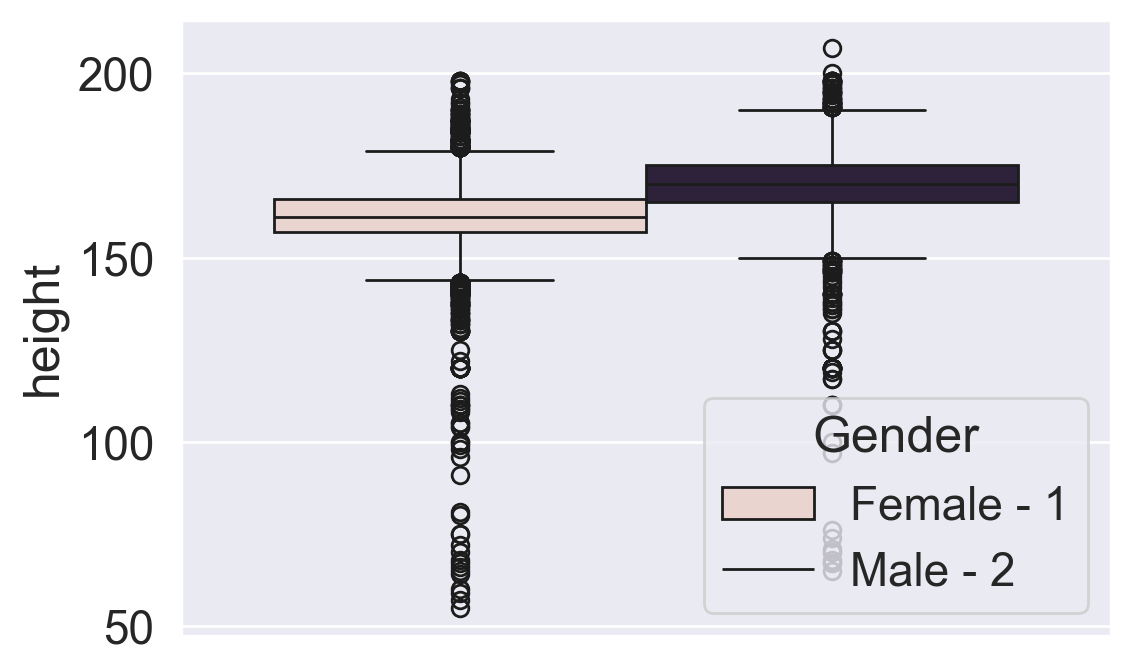

In [63]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[df.height < 208], y='height', hue='gender')
plt.legend(title='Gender', labels=['Female - 1', 'Male - 2'])

So gender 2 is for Male  

gender 1 is for Female

In [31]:
df.gender.value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

Question 1.2. (1 point). Who more often report consuming alcohol – men or women?

In [230]:
df.groupby("gender")["alco"].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

<Axes: xlabel='gender', ylabel='alco'>

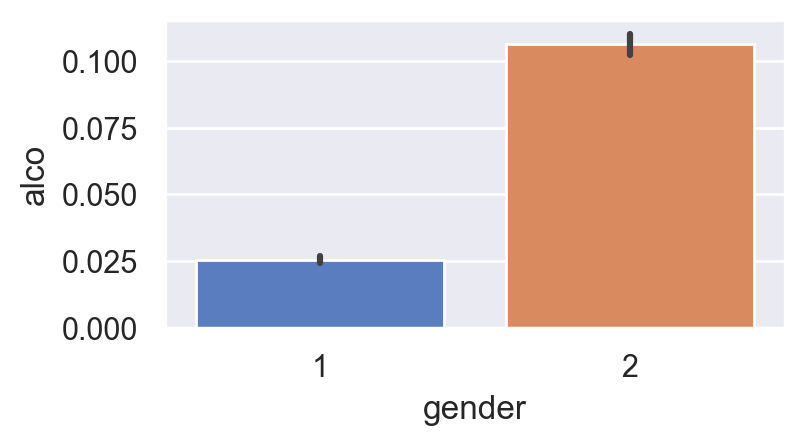

In [228]:
plt.figure(figsize=(4, 2))
sns.barplot(data=df, y='alco', palette="muted", x='gender')



Question 1.3. (1 point). What's the rounded difference between the percentages of smokers among men and women?

In [231]:
df.groupby("gender")["smoke"].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

In [232]:
round(
    100
    * (
        df.loc[df["gender"] == 2, "smoke"].mean()
        - df.loc[df["gender"] == 1, "smoke"].mean()
    )
)

20

In [225]:
df.groupby("smoke")["gender"].value_counts()

smoke  gender
0      1         44717
       2         19114
1      2          5356
       1           813
Name: count, dtype: int64

почему не верно, я не понимаю

<Axes: xlabel='gender', ylabel='smoke'>

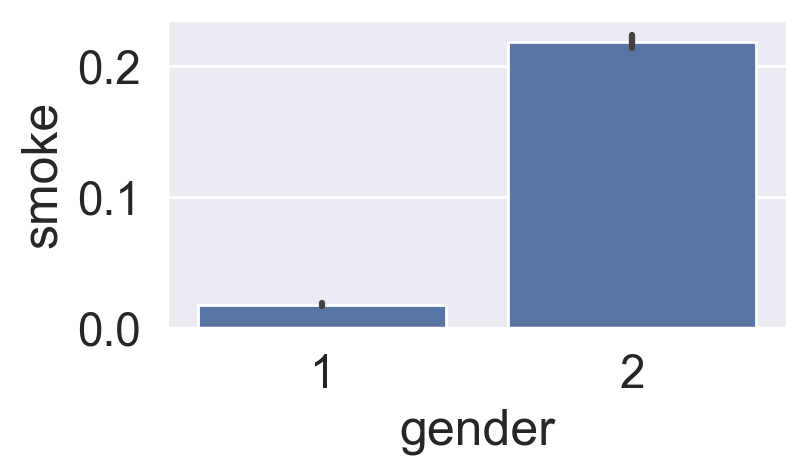

In [152]:
plt.figure(figsize=(4, 2))
sns.barplot(data=df, y='smoke', x='gender')

In [234]:
pd.crosstab(df[df.smoke == 1].gender.value_counts(normalize=True), df[df.smoke == 1].gender.value_counts())

count,813,5356
proportion,,
0.131788,1,0
0.868212,0,1


In [141]:
smoke_man, smoke_woman = list(df[df.smoke == 1].gender.value_counts(normalize=True))
round((smoke_man - smoke_woman) * 100)

74



Question 1.4. (1 point). What's the rounded difference between median values of age (in months) for non-smokers and smokers?

In [235]:
(
    df[df["smoke"] == 0]["age"].median() - df[df["smoke"] == 1]["age"].median()
) / 365.25 * 12

19.613963039014372

In [107]:
((df[df.smoke == 0].age/30).median() - (df[df.smoke == 1].age/30).median()).round()

20.0



Question 1.5. (2 points). Calculate fractions of ill people (with CVD) in the two groups of people described in the task. What's the ratio of these two fractions?

Clarifications:

Calculate age_years feature – round age to the nearest number of years. For this task, select only the people of age 60 to 64, inclusive.

Cholesterol level categories differ between the figure and our dataset. The conversion for the cholesterol feature is as follows: 4 mmol/l - 1, 5-7 mmol/l - 2, 8 mmol/l - 3

THIS WAS SOOO WRONG  
1 st group = alco  2 nd group = smokers  fraction of cardio 1

In [7]:
df['age_in_years'] = round(df.age / 365.25, 1)

In [8]:
old_60_64_include = df[(df.age_in_years >= 60) & (df.age_in_years <= 64)]

In [9]:
df[(df.smoke == 1) & (df.age_in_years >= 60) & (df.age_in_years <= 64) & (df.ap_hi <= 120) & (df.gluc == 1)]['cardio'].value_counts()

cardio
0    167
1    106
Name: count, dtype: int64

In [71]:
round(a / b, 3)

1.296

In [74]:
df[(df.smoke == 1) & (df.age_in_years >= 60) & (df.age_in_years <= 64) & (df.ap_hi >= 180) & (df.gluc == 3)]['cardio'].value_counts()

cardio
1    2
Name: count, dtype: int64

ЮРИЙЙЙЙЙЙЙЙЙЙЙЙЙЙЙЙ

In [ ]:
smoking_old_men = df[
    (df["gender"] == 2)
    & (df["age_in_years"] >= 60)
    & (df["age_in_years"] < 65)
    & (df["smoke"] == 1)
]

smoking_old_men[
    (smoking_old_men["cholesterol"] == 1) & (smoking_old_men["ap_hi"] < 120)
]["cardio"].mean()

smoking_old_men[
    (smoking_old_men["cholesterol"] == 3)
    & (smoking_old_men["ap_hi"] >= 160)
    & (smoking_old_men["ap_hi"] < 180)
]["cardio"].mean()

In [ ]:
df["age_years"] = (df["age"] / 365.25).round().astype("int")
df["age_years"].max()



Question 1.6. (2 points). Choose the correct statements:  

Median BMI in the sample is within boundaries of normal values.  26.4 NO  
Women's BMI is on average higher then men's.  on graphic YESH  
Healthy people have higher median BMI than ill people.  on graphic NO    
In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment of healthy and non-drinking women on graphic YESH  

Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilograms by the square of the height in meters. Normal BMI values are said to be from 18.5 to 25.

In [239]:
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI_index,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.4,22.0,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.4,34.9,55.0


In [244]:
df.groupby(["gender", "alco", "cardio"])["BMI_index"].median().to_frame()

BMI_index
gender alco cardio           
1      0    0            25.7
            1            27.9
       1    0            27.9
            1            30.1
2      0    0            25.1
            1            26.7
       1    0            25.4
            1            27.5

In [245]:
df.groupby(["gender", "alco", "cardio"])["BMI_index"].mean().to_frame()

BMI_index
gender alco cardio           
1      0    0       26.843261
            1       29.051327
       1    0       28.667698
            1       30.811399
2      0    0       25.872804
            1       27.522241
       1    0       26.096100
            1       28.226929

In [10]:
df["BMI_index"] = round(df.weight / (df.height / 100) ** 2, 1)

<Axes: xlabel='BMI_index'>

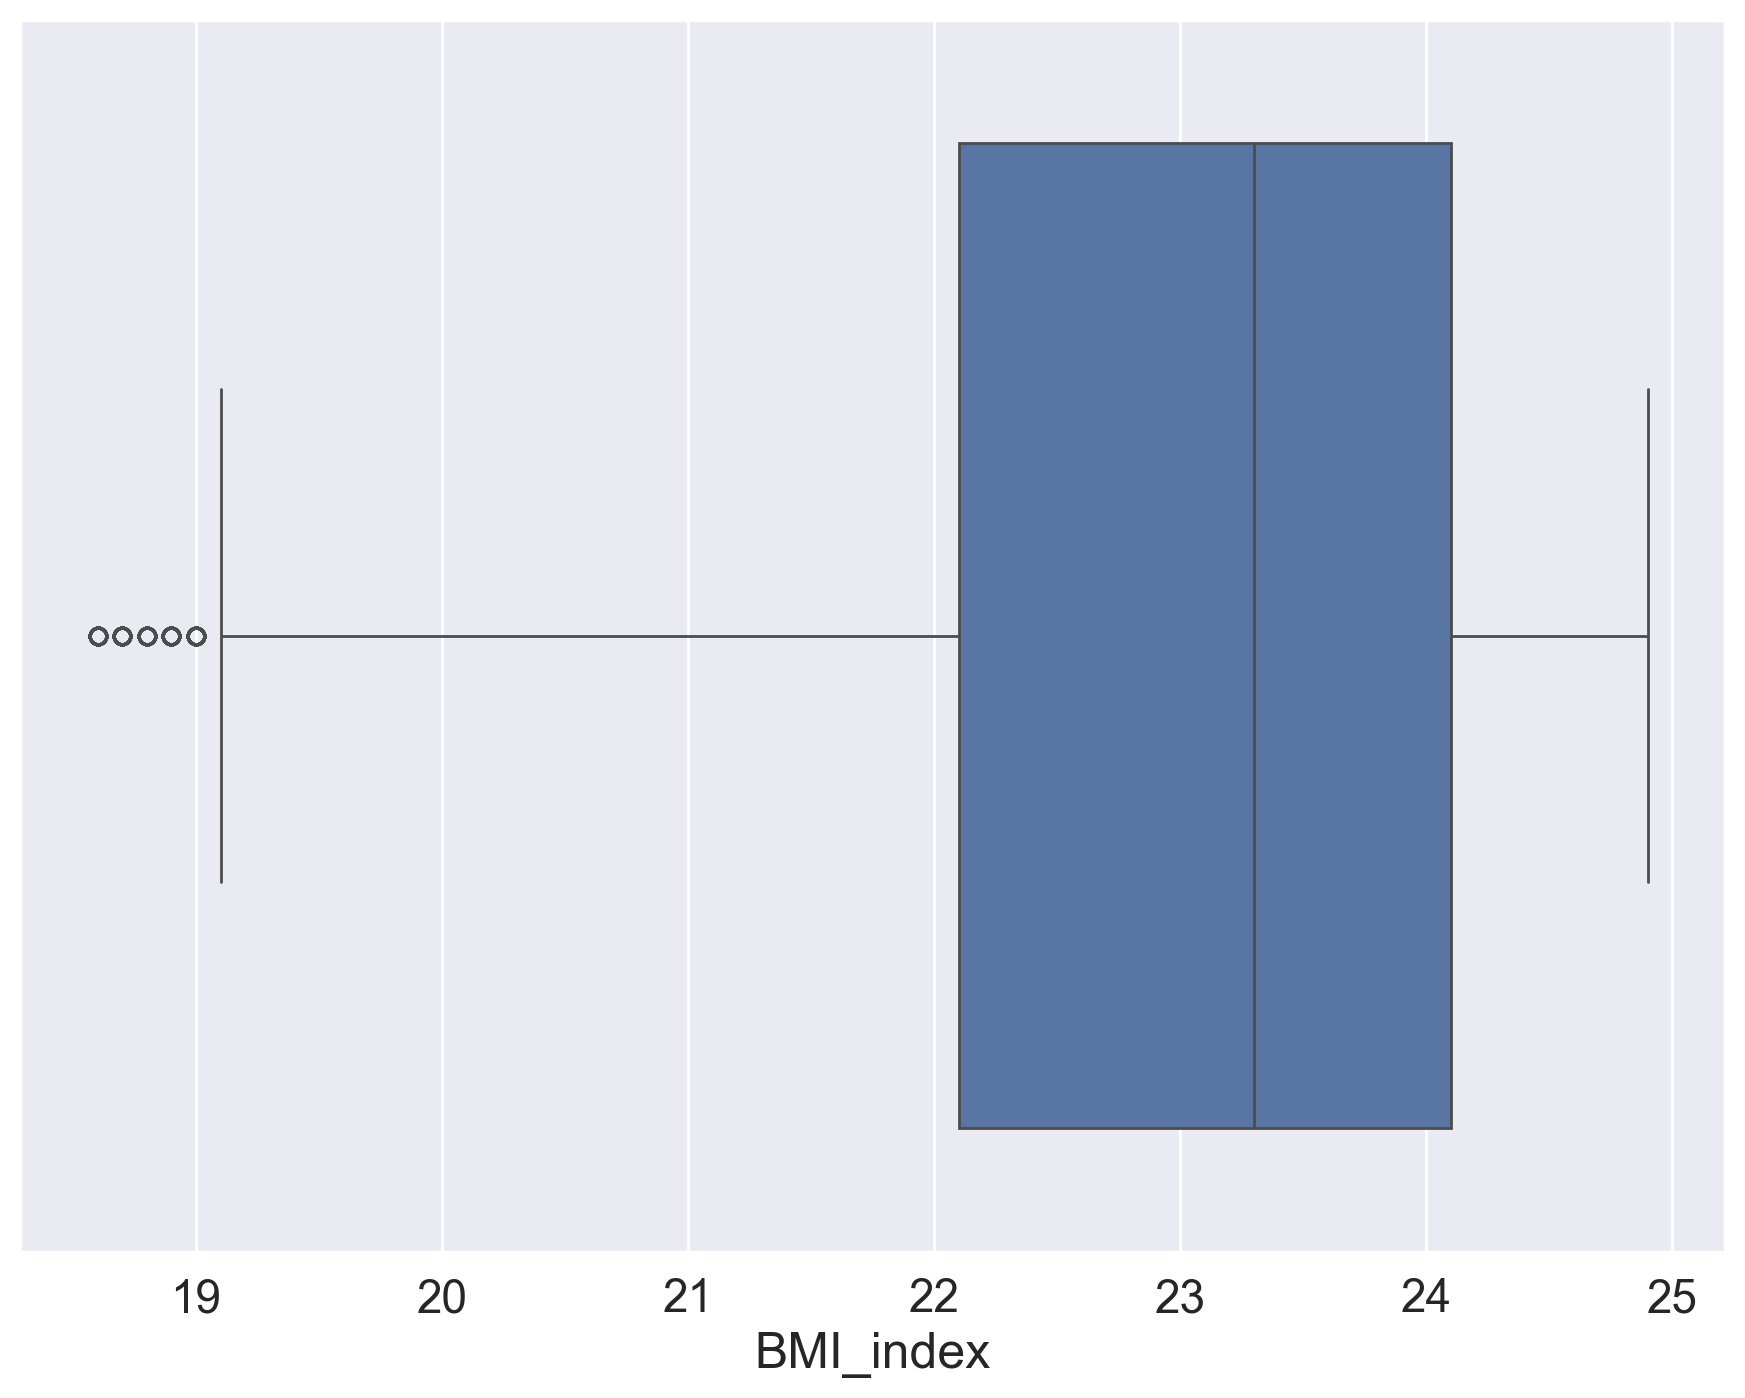

In [33]:
# how much with normal BMI
normal_BMI = df[(df.BMI_index > 18.5) & (df.BMI_index < 25)]
sns.boxplot(data=normal_BMI, x='BMI_index')
# normal_BMI['BMI_index'].value_counts()
# normal_BMI

In [34]:
df.BMI_index.median()

26.4

<Axes: xlabel='BMI_index'>

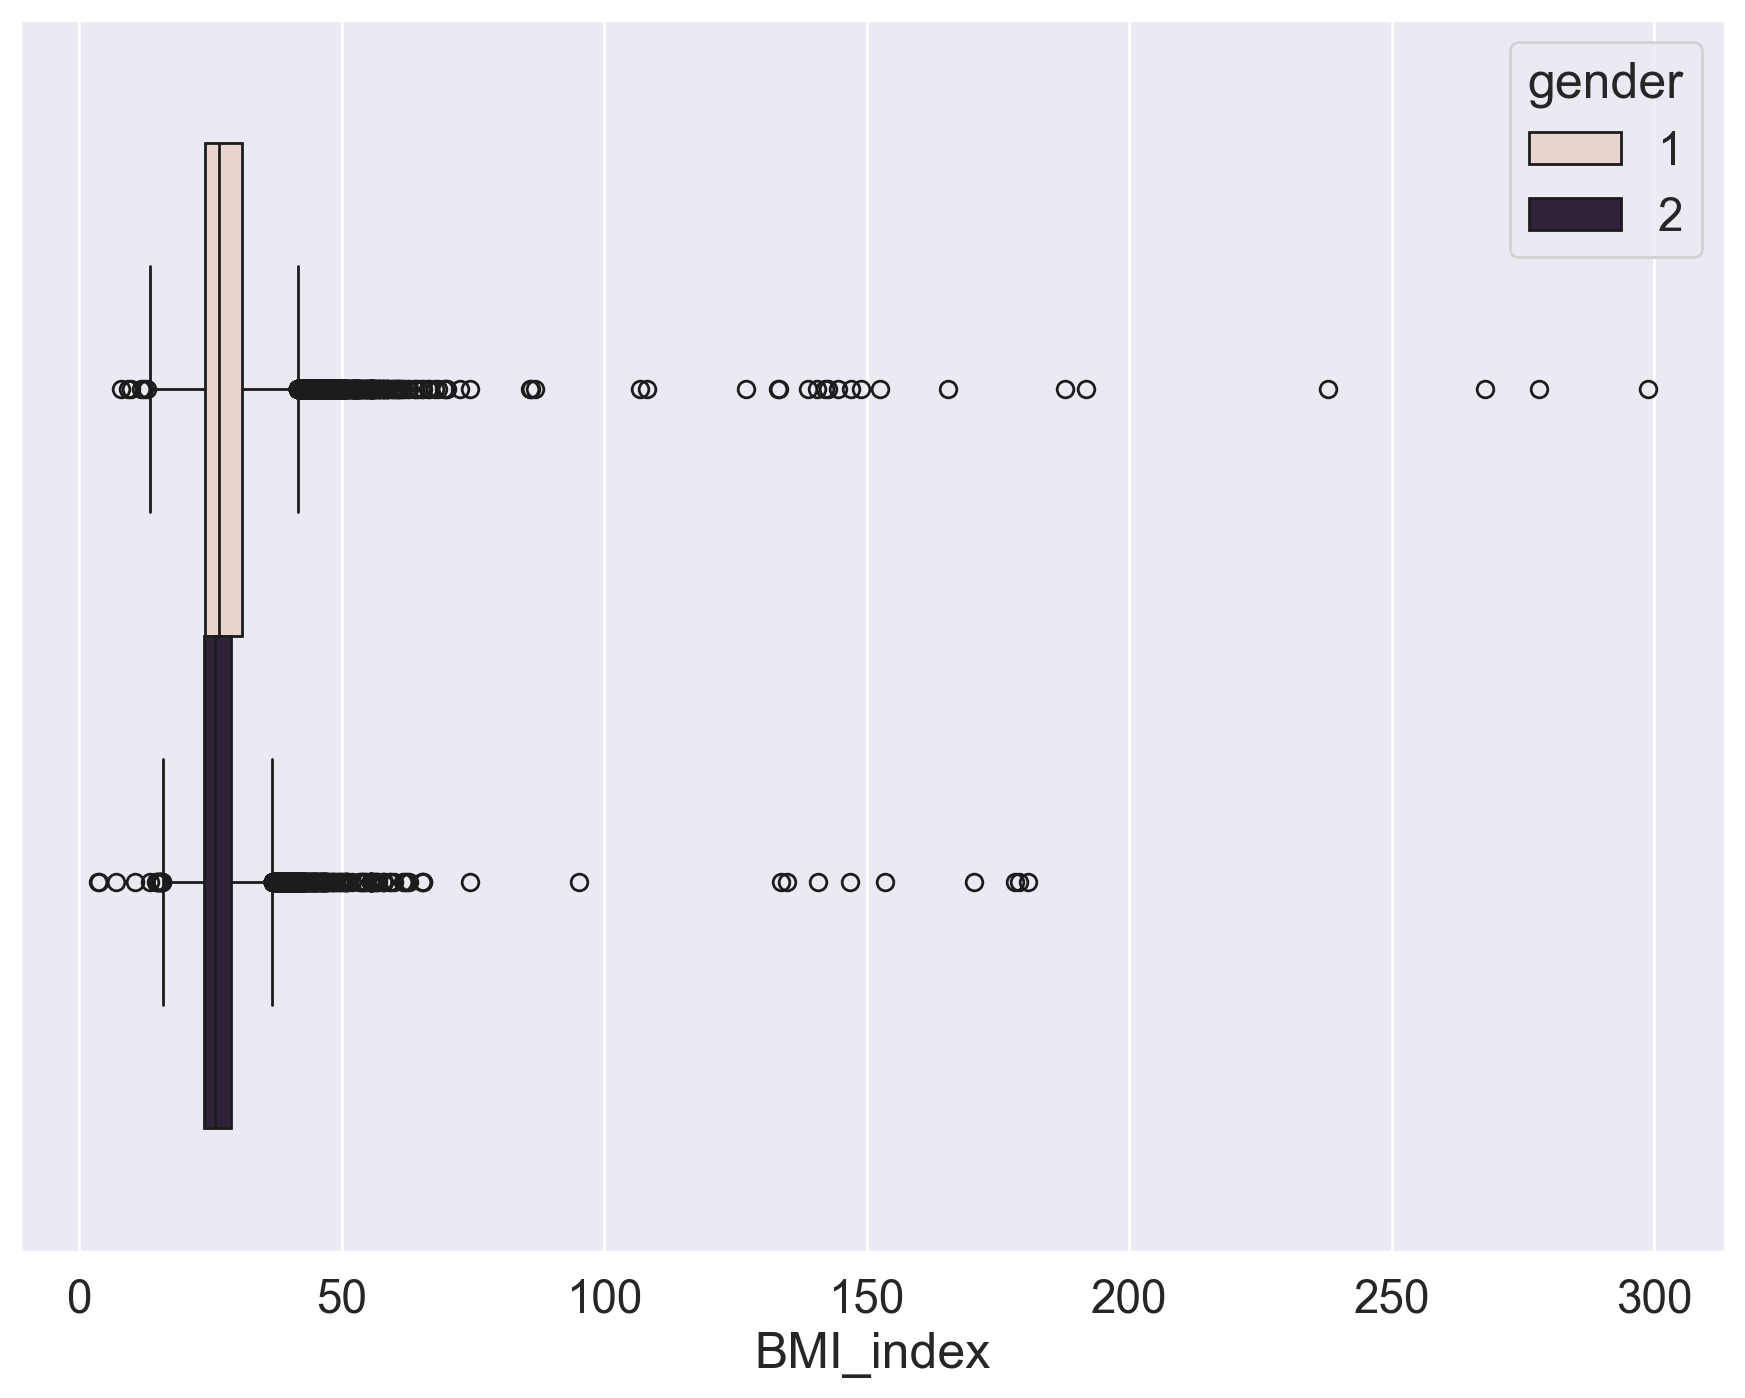

In [35]:
sns.boxplot(data=df, x='BMI_index', hue='gender')

<Axes: xlabel='cardio', ylabel='BMI_index'>

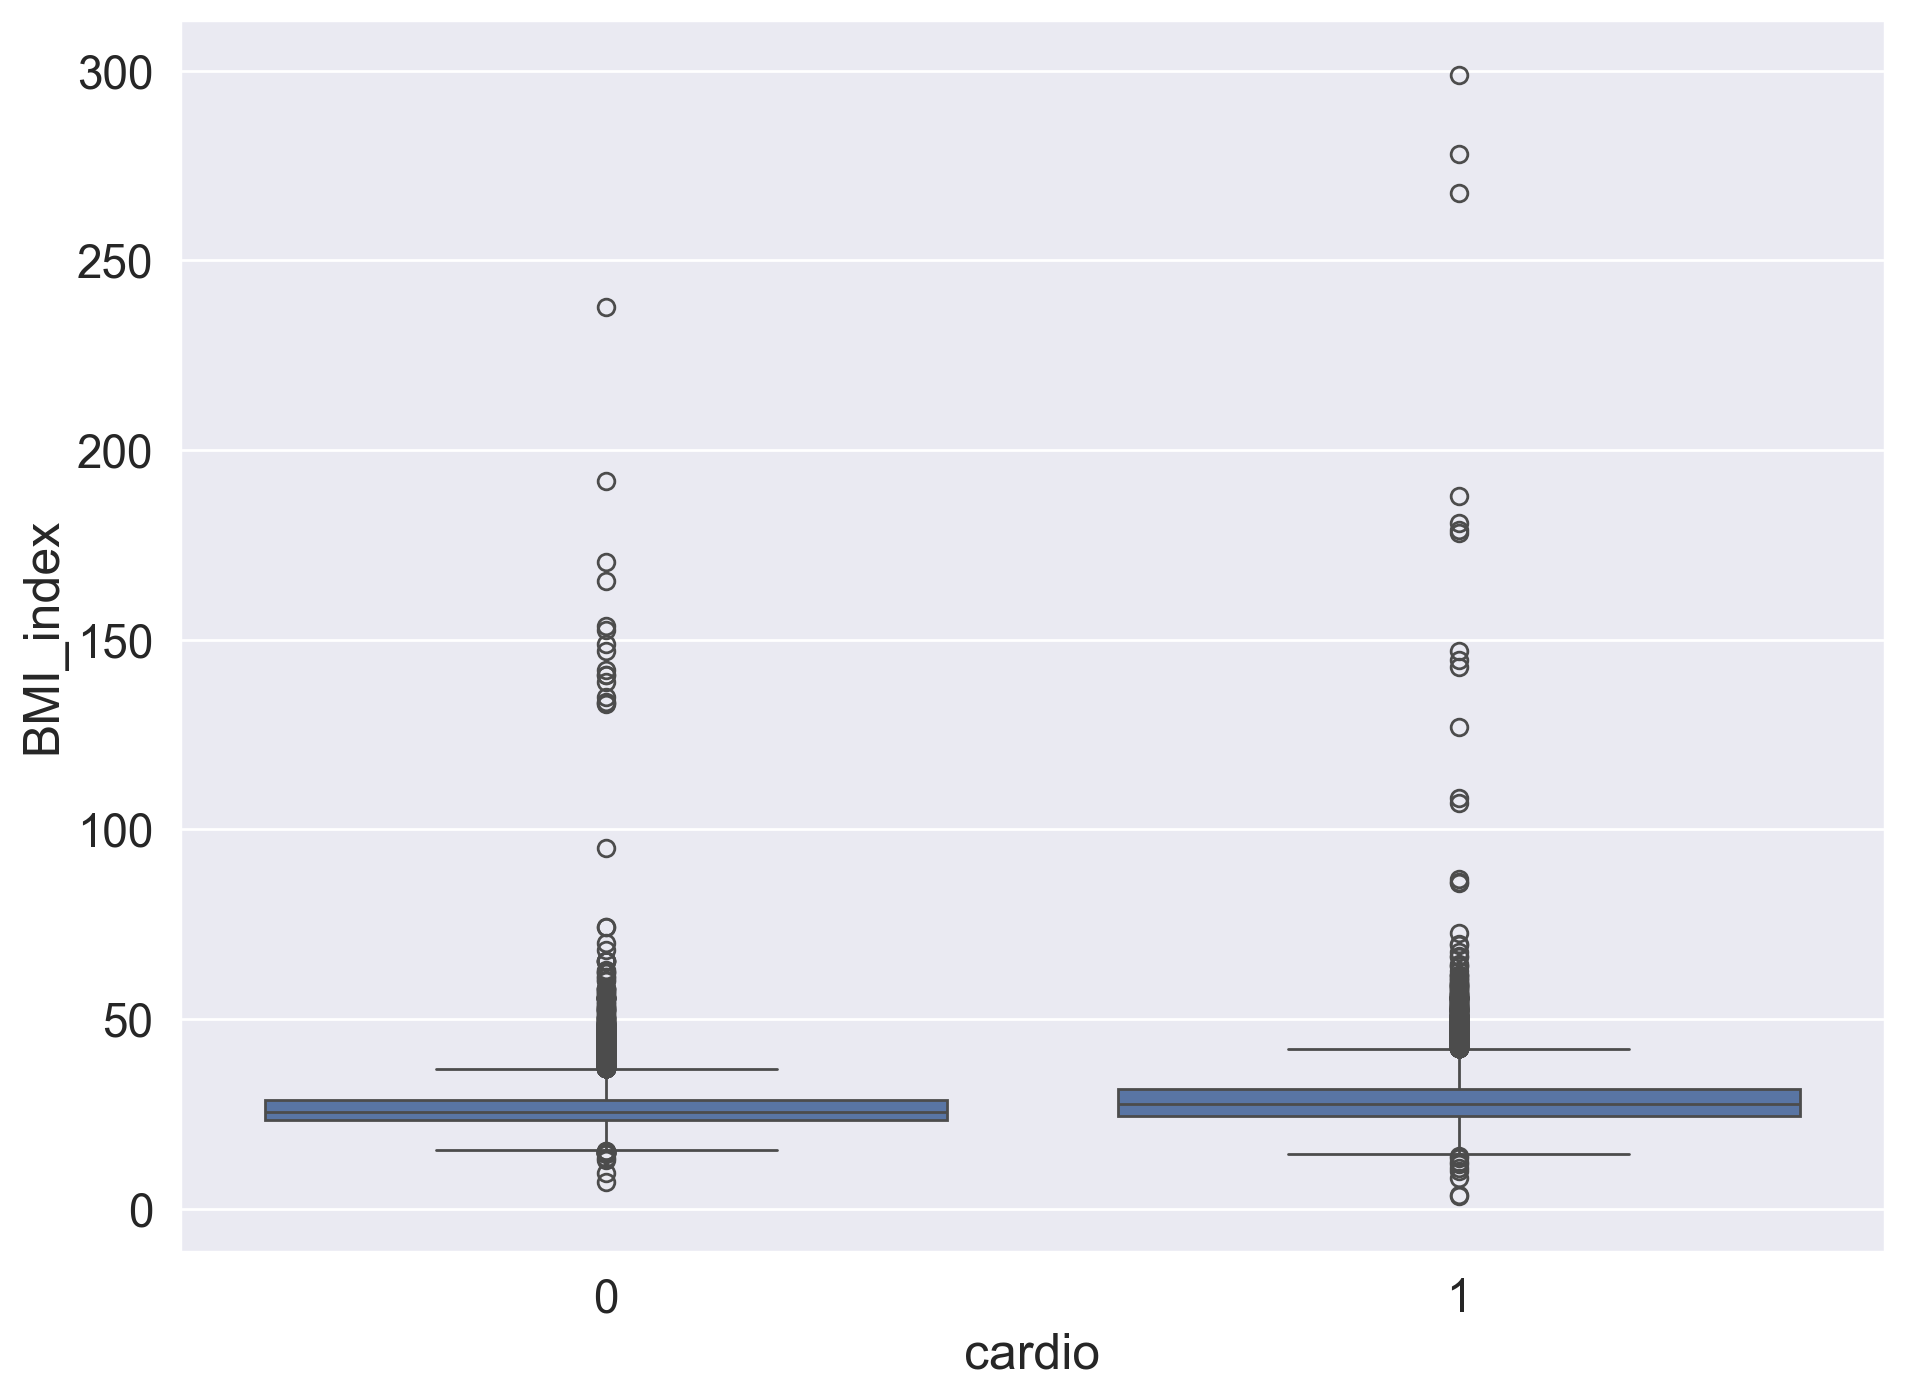

In [36]:
sns.boxplot(data=df, y='BMI_index', x='cardio')

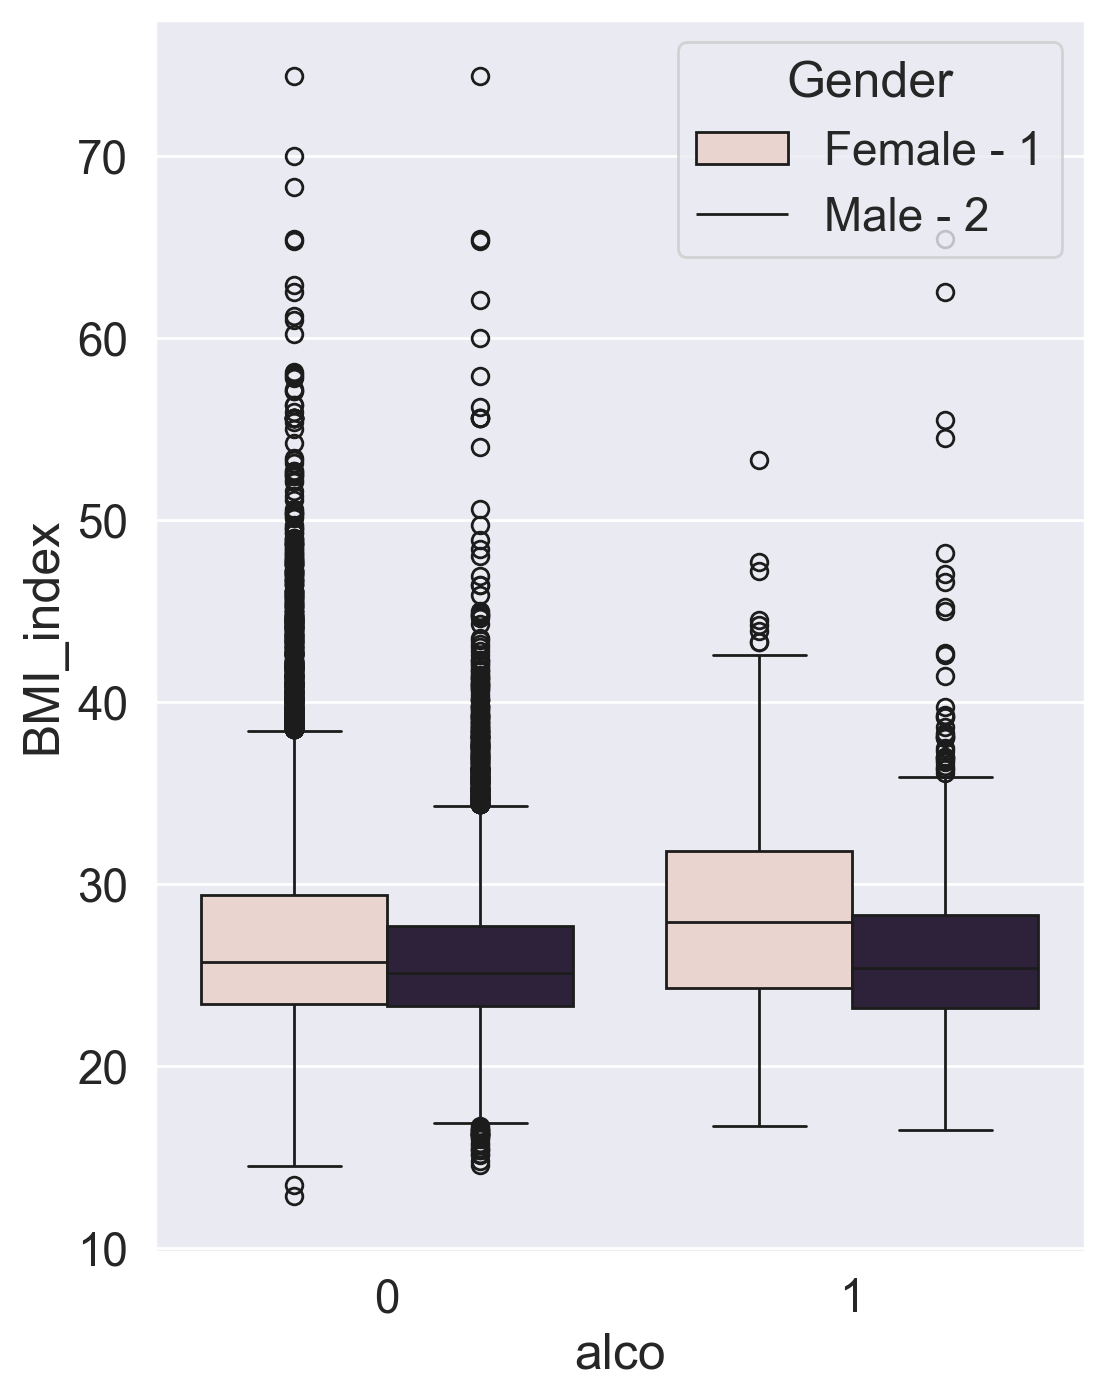

In [52]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df[(df.cardio == 0) & (df.BMI_index < 80) & (df.BMI_index > 10)], y='BMI_index', x='alco', hue='gender')
plt.legend(title='Gender', labels=['Female - 1', 'Male - 2'])



Question 1.7. (2 points). What percent of the original data (rounded) did we filter out in the previous step?

In [27]:
df_to_remove = df[
    (df["ap_lo"] > df["ap_hi"])
    | (df["height"] < df["height"].quantile(0.025))
    | (df["height"] > df["height"].quantile(0.975))
    | (df["weight"] < df["weight"].quantile(0.025))
    | (df["weight"] > df["weight"].quantile(0.975))
]
print(round((df_to_remove.shape[0] / df.shape[0]) * 100))

filtered_df = df[~df.index.isin(df_to_remove)]

10


In [79]:
df_to_remove = df[
    (df["ap_lo"] > df["ap_hi"])
    | (df["height"] < df["height"].quantile(0.025))
    | (df["height"] > df["height"].quantile(0.975))
    | (df["weight"] < df["weight"].quantile(0.025))
    | (df["weight"] > df["weight"].quantile(0.975))
]
# print(round((df_to_remove.shape[0] / df.shape[0]) * 100))

clean_age_df = df[~df.index.isin(df_to_remove)]

In [23]:
round(100 - (clean_df.shape[0] / df.shape[0] * 100))

16

In [11]:
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI_index
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.4,22.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.4,34.9


diastolic pressure is higher than systolic

In [12]:
df.shape

(70000, 15)

In [16]:
clean_df = df[df.ap_lo < df.ap_hi]
clean_df.shape

(68764, 15)


height is strictly less than 2.5 percentile (Use pd.Series.quantile to compute this value. If you are not familiar with the function, please read the docs.)

In [ ]:
df.height.quantile(0.025)

In [ ]:
np.percentile(df.height, 2.5)

In [19]:
clean_df = clean_df[clean_df.height > clean_df.height.quantile(0.025)]
clean_df.shape

(64502, 15)


height is strictly more than 97.5 percentile  

In [20]:
clean_df = clean_df[clean_df.height < clean_df.height.quantile(0.975)]
clean_df.shape

(62242, 15)


weight is strictly less than 2.5 percentile


In [21]:
clean_df = clean_df[clean_df.weight > clean_df.weight.quantile(0.025)]
clean_df.shape

(60647, 15)


weight is strictly more than 97.5 percentile

In [22]:
clean_df = clean_df[clean_df.weight < clean_df.weight.quantile(0.975)]
clean_df.shape

(59007, 15)



Question 2.1. (1 point). Which pair of features has the strongest Pearson's correlation with the gender feature?

Cardio, Cholesterol - 0.22
Height, Smoke - 0.18
Smoke, Alco - 0.34
Height, Weight -0.23

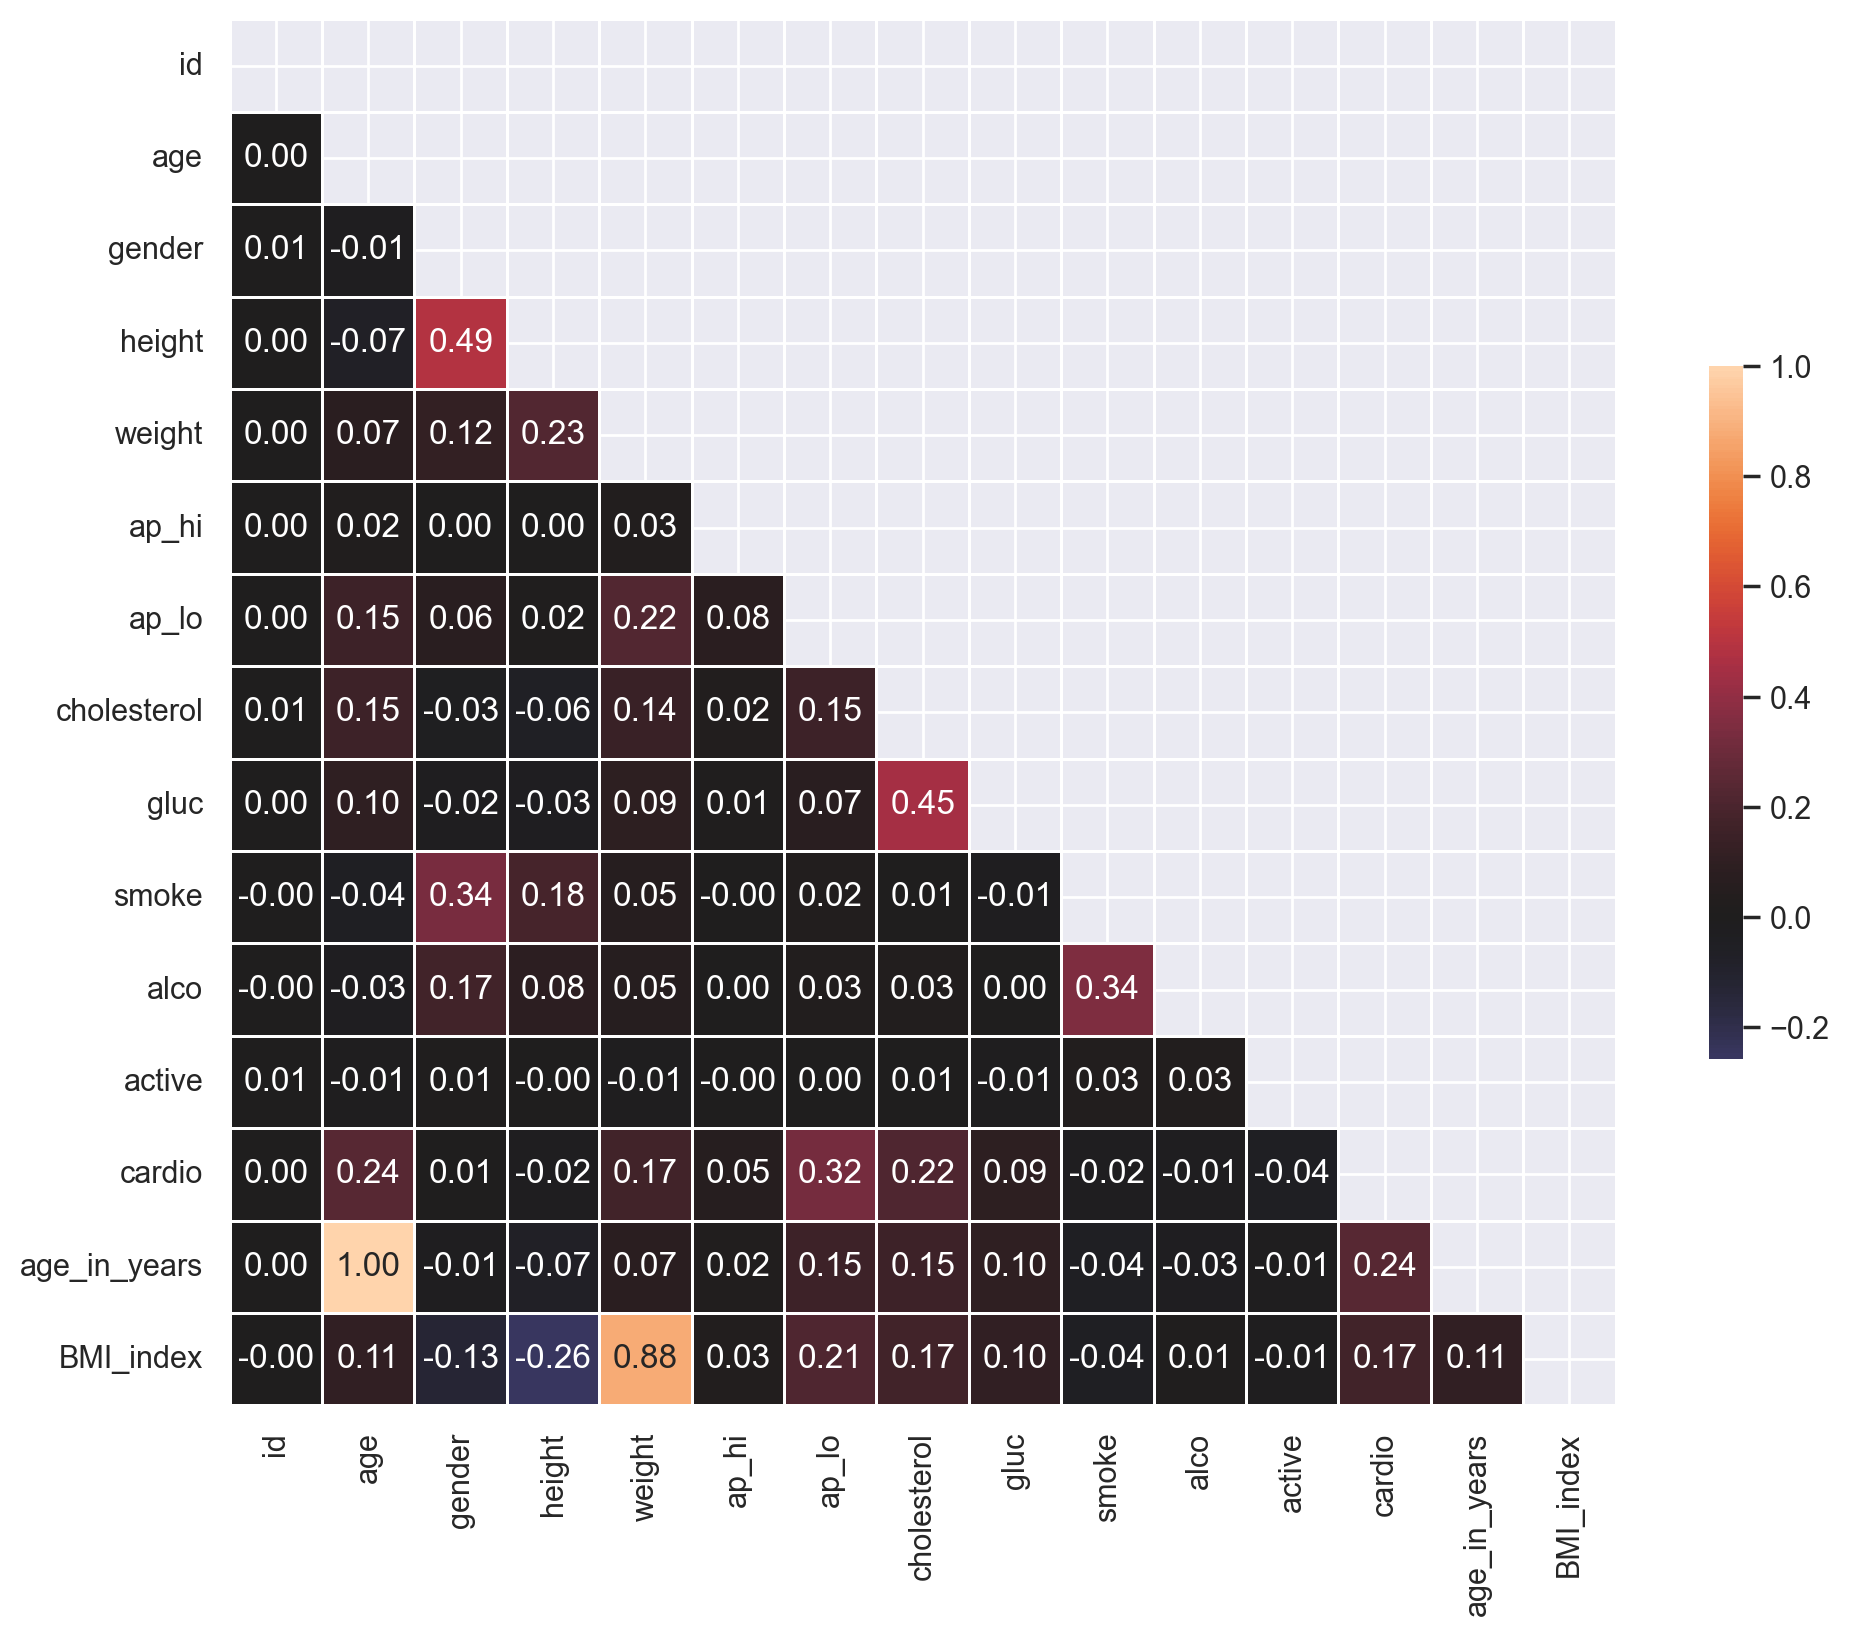

In [49]:
# Calculate the correlation matrix
df = filtered_df.copy()

corr = clean_df.corr(method="pearson")

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

In [ ]:
pairs_list = ["Cardio", "Cholesterol",
              "Height", "Smoke",
              "Smoke", "Alco",
              "Height", "Weight"]

In [ ]:
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls",
        ]
    )
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

<Axes: >

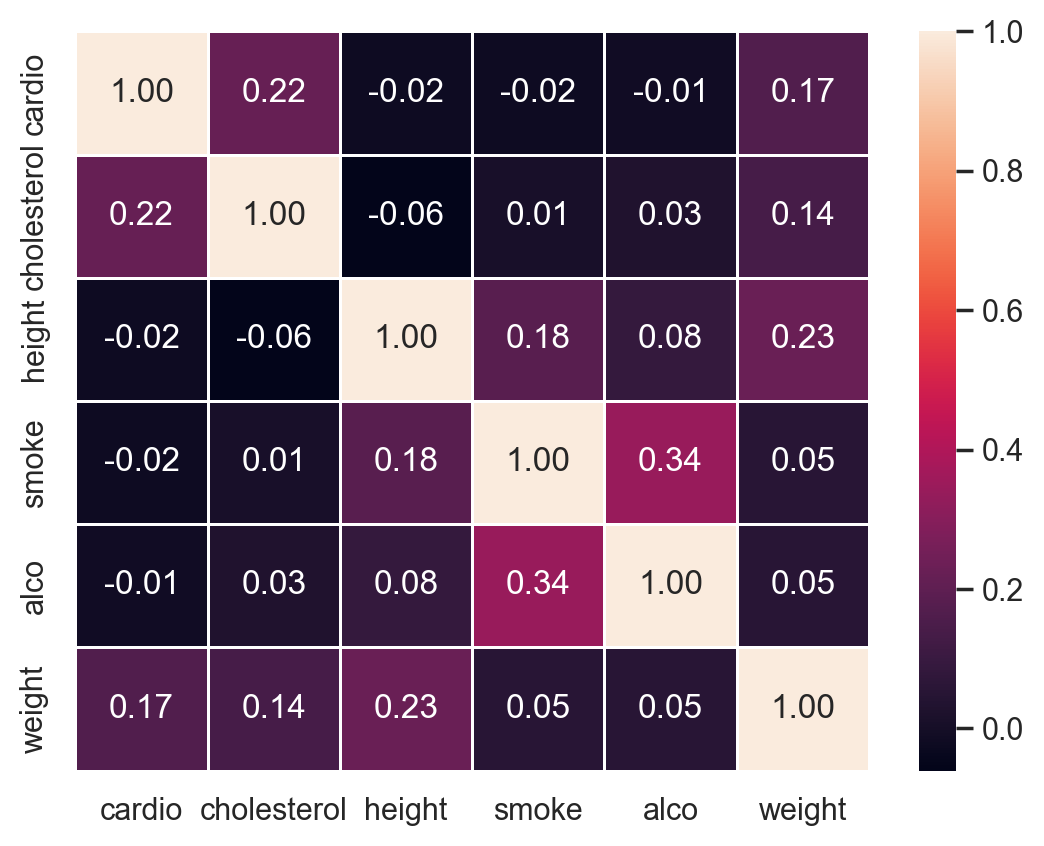

In [51]:
pairs_list = ["cardio", "cholesterol", "height", "smoke", "alco", "weight"]
corr_matrix = clean_df[pairs_list].corr(method="pearson")
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", linewidths=0.5)

G:Cardio, Cholesterol - -0.02
G:Height, Smoke - 0.49+0.34
G:Smoke, Alco - 0.17+0.34
G:Height, Weight - 0.49+0.12

In [5]:
platform_genre_sales = (
    df.pivot_table(
        index="Platform", columns="Genre", values="Global_Sales", aggfunc=sum
    )
    .fillna(0)
    .applymap(float))

KeyError: 'Global_Sales'

In [144]:
clean_df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI_index,age_in_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,50.4
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9,55.4


In [ ]:
tar = (
    clean_df.pivot_table(
        index="cardio", columns="cholesterol", values="gender"
    )
    .applymap(float))
sns.heatmap(data=tar, annot=True, fmt=".1f", linewidths=0.5)

<Axes: xlabel='smoke', ylabel='height'>

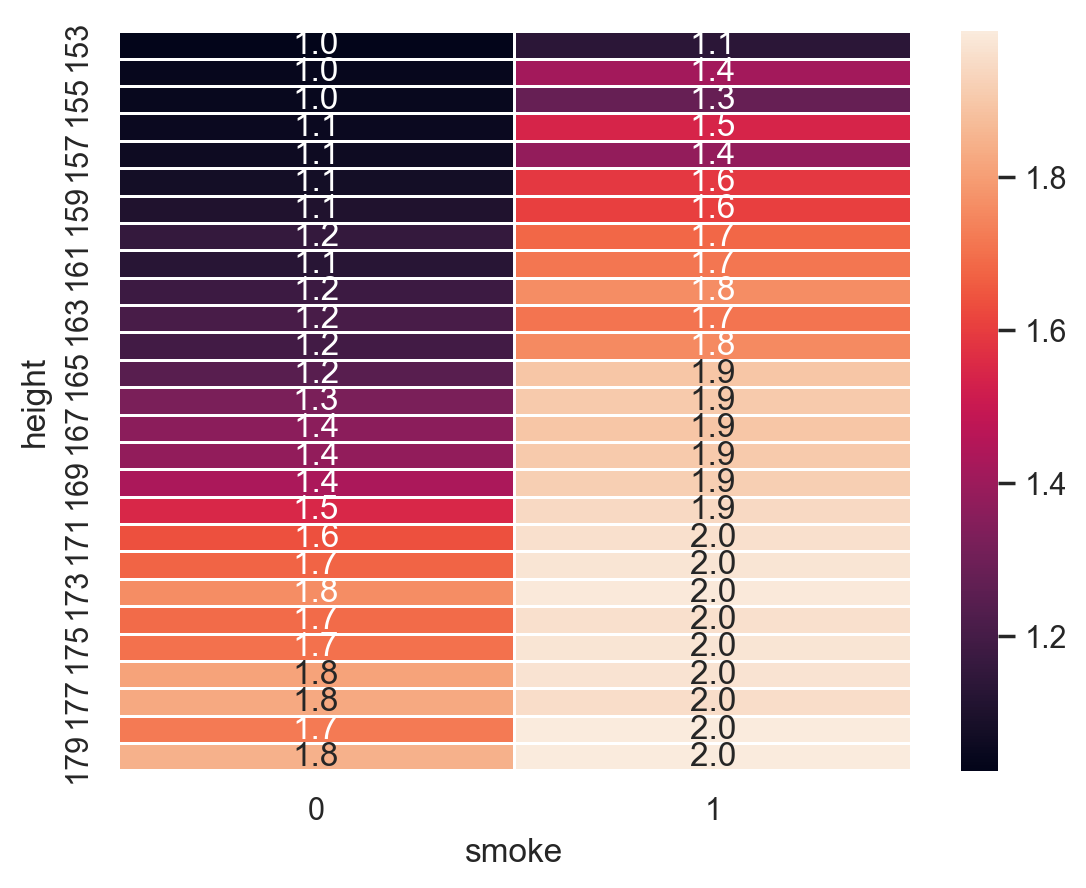

In [38]:
tar = (
    clean_df.pivot_table(
        index="height", columns="smoke", values="gender"
    )
    .applymap(float))
sns.heatmap(data=tar, annot=True, fmt=".1f", linewidths=0.5)

<Axes: xlabel='alco', ylabel='smoke'>

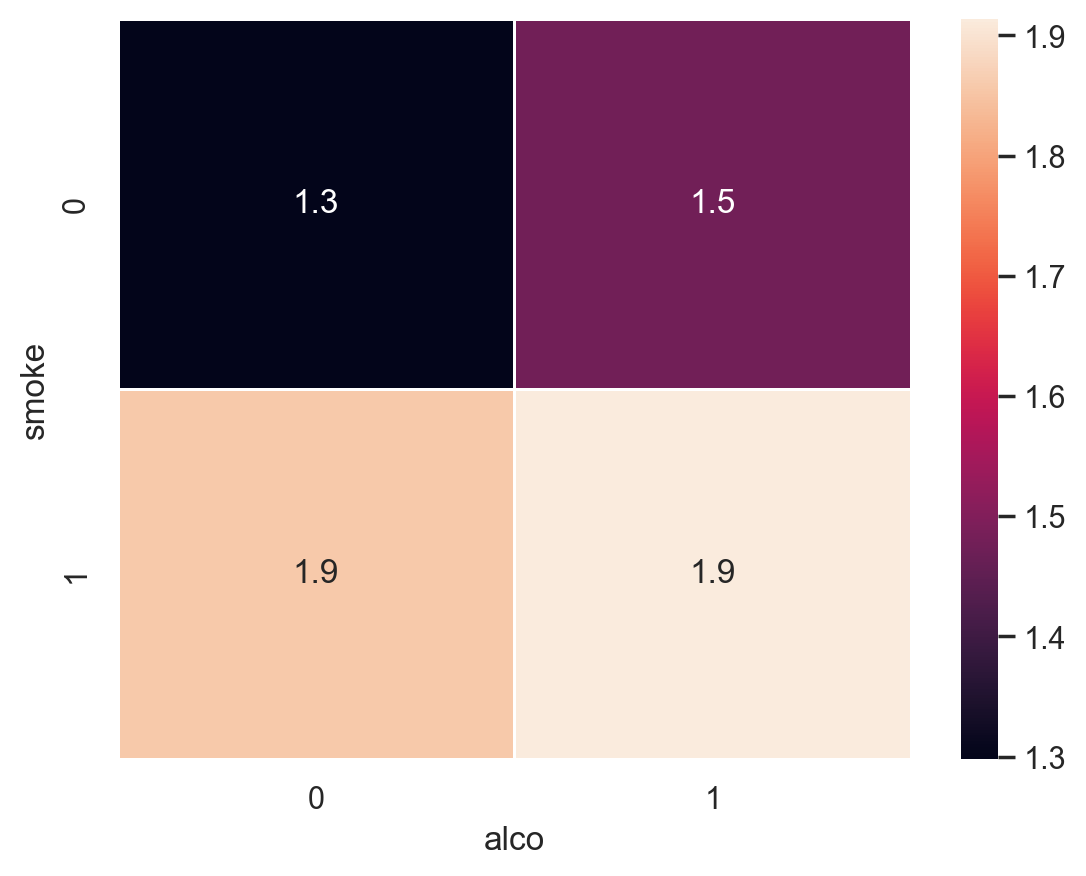

In [40]:
tar = (
    clean_df.pivot_table(
        index="smoke", columns="alco", values="gender"
    )
    .applymap(float))
sns.heatmap(data=tar, annot=True, fmt=".1f", linewidths=0.5)

<Axes: xlabel='weight', ylabel='height'>

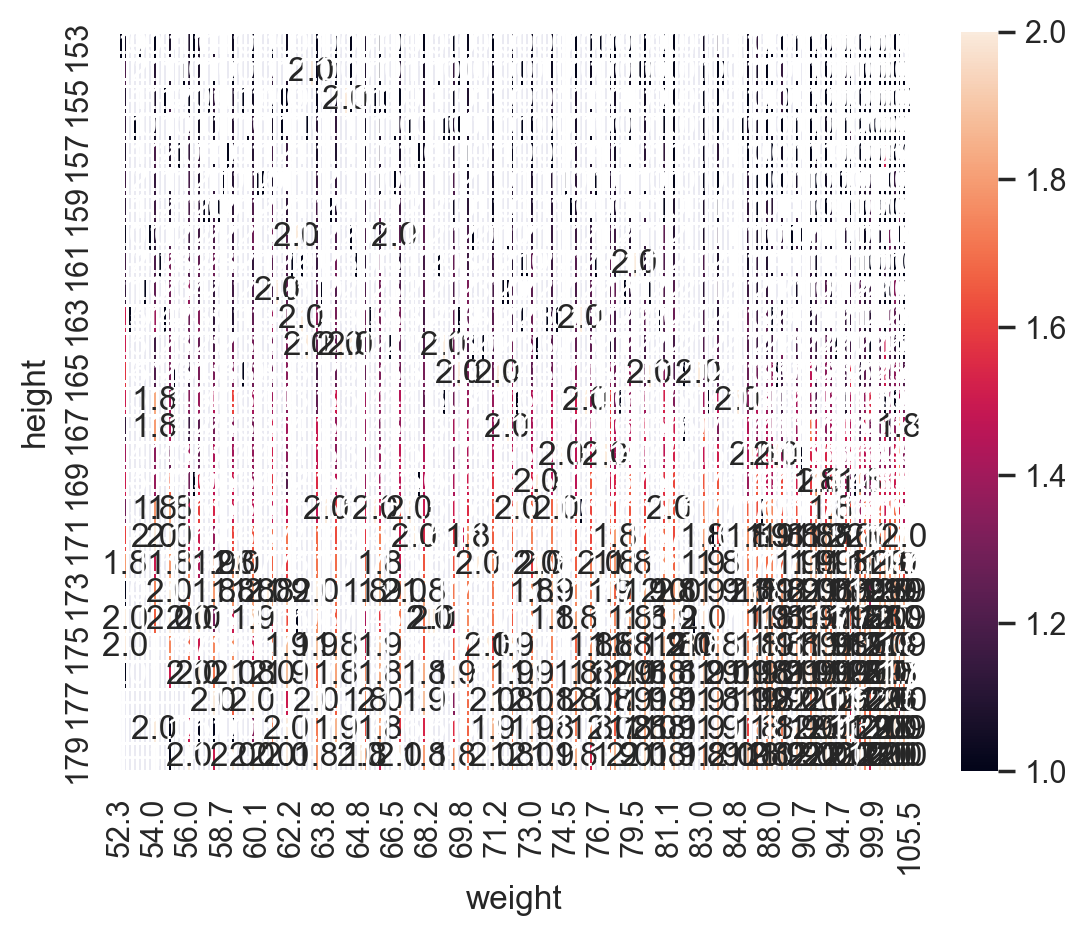

In [41]:
tar = (
    clean_df.pivot_table(
        index="height", columns="weight", values="gender"
    )
    .applymap(float))
sns.heatmap(data=tar, annot=True, fmt=".1f", linewidths=0.5)

**2.2. Height distribution of men and women**

In [ ]:
df_melt = pd.melt(frame=df, value_vars=["height"], id_vars=["gender"])

plt.figure(figsize=(6, 5))
ax = sns.violinplot(
    x="variable",
    y="value",
    hue="gender",
    palette="muted",
    split=True,
    data=df_melt,
    scale="count",
    scale_hue=False,
)

In [69]:
clean_df[['gender', 'height']]

,gender,height
0,2,168
1,1,156
2,1,165
3,2,169
4,1,156
...,...,...
69993,1,172
69994,1,165
69995,2,168
69998,1,163


In [64]:
df_melt = pd.melt(frame=clean_df, value_vars=["height"], id_vars=["gender"])
df_melt

,gender,variable,value
0,2,height,168
1,1,height,156
2,1,height,165
3,2,height,169
4,1,height,156
...,...,...,...
59002,1,height,172
59003,1,height,165
59004,2,height,168
59005,1,height,163


<Axes: ylabel='height'>

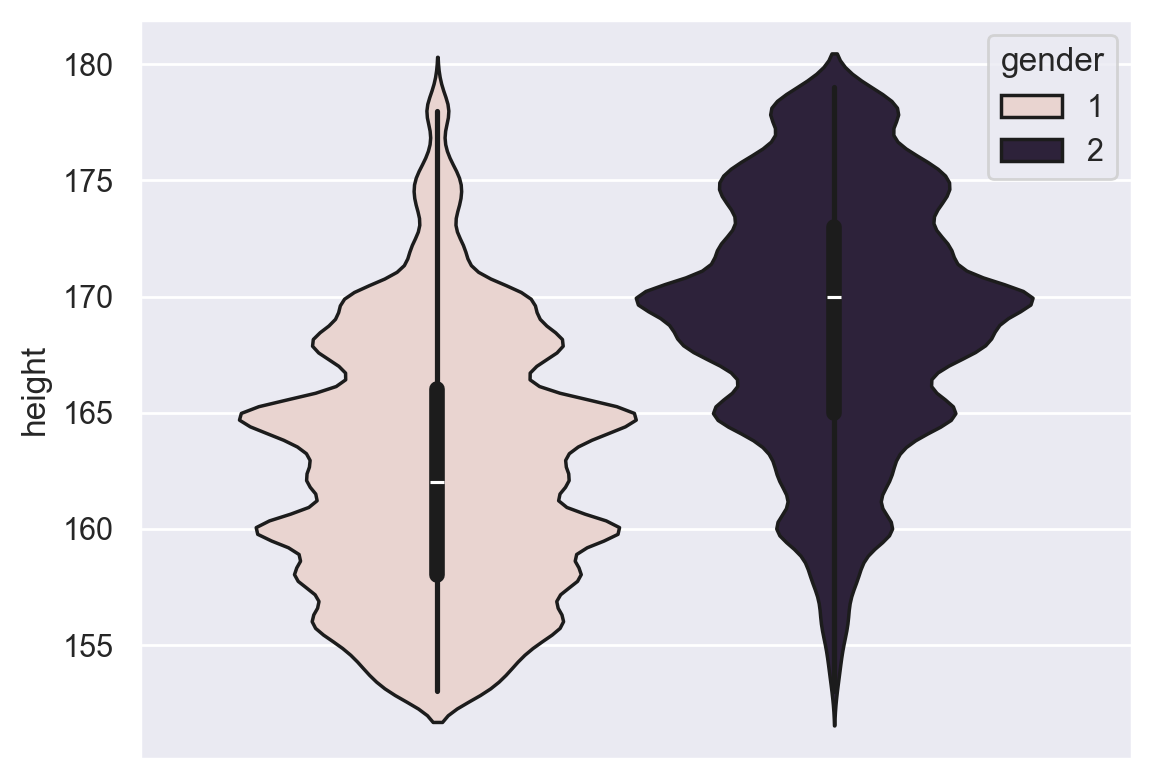

In [58]:
sns.violinplot(data=clean_df, hue='gender', y='height', scale='area')



Question 2.2. (1 point). Which pair of features has the strongest Spearman rank correlation?

<Axes: >

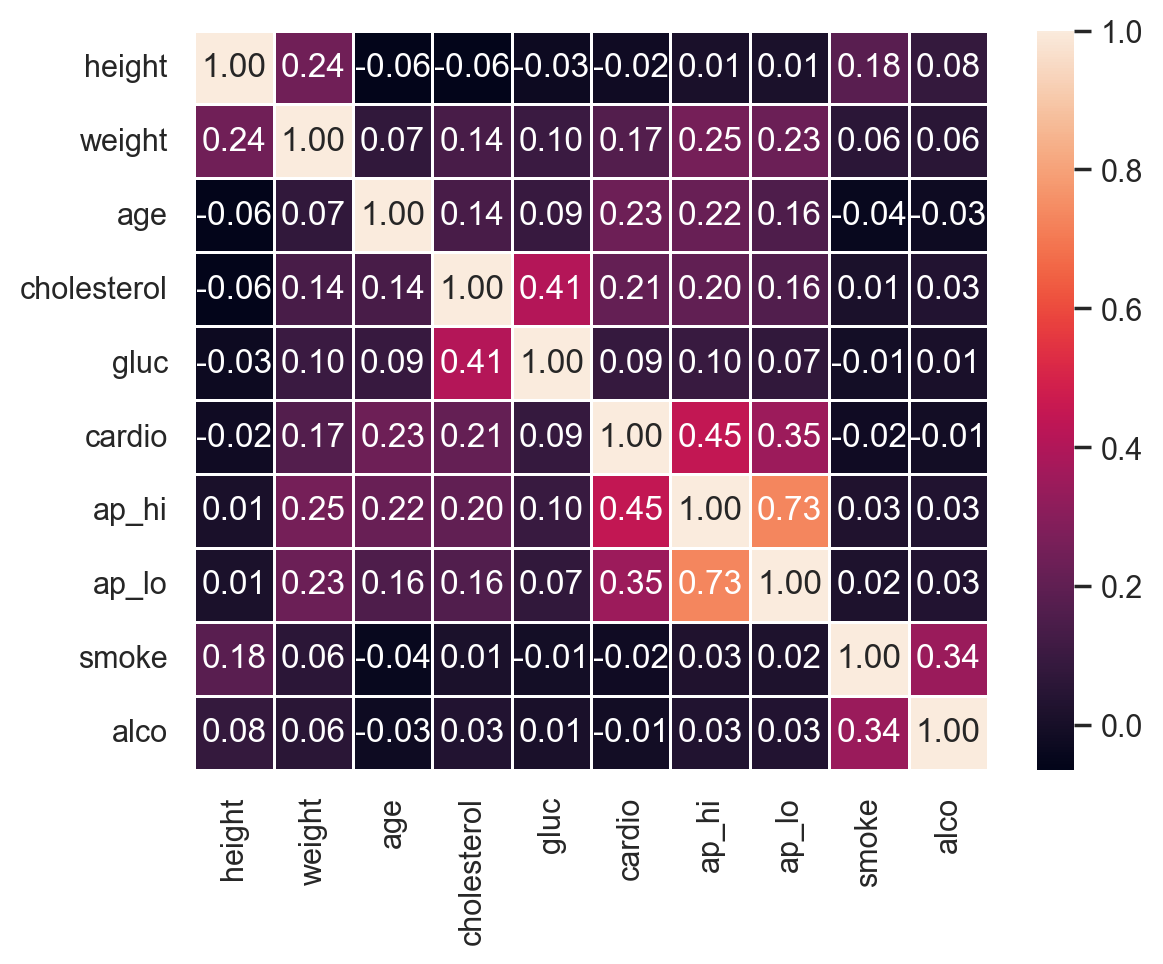

In [71]:
pairs_list_Spearman = ["height", "weight", "age", "cholesterol", "gluc", "cardio", "ap_hi", "ap_lo", "smoke", "alco"]
corr_matrix = clean_df[pairs_list_Spearman].corr(method="spearman")
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", linewidths=0.5)

Height, Weight  -  0.24  
Age, Weight  -  0.07  
Cholesterol, Gluc  -  0.41  
Cardio, Cholesterol  -  0.21  
Ap_hi, Ap_lo  -  0.73  
Smoke, Alco  -  0.34  



Question 2.3. (1 point). Why do these features have strong rank correlation?

In [ ]:
# answer is 3



Question 2.4. (1 point). What is the smallest age at which the number of people with CVD outnumbers the number of people without CVD?

In [81]:
only_ill = clean_age_df[clean_age_df.cardio == 1]
# only_ill.rename(columns={'count': 'summ_ill'}, inplace=True)
only_ill.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI_index,years
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.4,34.9,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.6,23.5,52.0


In [77]:
df['years'] = round(df.age / 365.25)

In [206]:
summary_ill_by_age = only_ill.groupby('years').years.value_counts().rename('summ_ill')
summary_ill_by_age.head(2)

years
39.0    105
40.0    615
Name: summ_ill, dtype: int64

In [94]:
len(summary_ill_by_age)

27

In [211]:
only_healthy = clean_age_df[(clean_age_df.cardio == 0) & (clean_age_df.years > 30)]
# only_healthy.rename(columns={'count': 'summ_healthy'}, inplace=True)
summary_healthy_by_age = only_healthy.groupby('years').years.value_counts().rename('summ_h')
summary_healthy_by_age.head(2)

years
39.0     365
40.0    2061
Name: summ_h, dtype: int64

In [93]:
len(summary_healthy_by_age)

27

In [ ]:
summary_ill_by_age.columns()

In [251]:
df_2.rename(columns={"count": "summ_h"}).head(2)

,summ_h
years,
39.0,365
40.0,2061


In [213]:
df_1 = pd.DataFrame(summary_ill_by_age)
df_2 = pd.DataFrame(summary_healthy_by_age).rename(columns={"count": "summ_h"})
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head(2)

,summ_ill,summ_h
years,,
39.0,105,365
40.0,615,2061


In [199]:
df_2.rename(columns={"count": "summ_h"})
df_2.head(2)

,count
years,
39.0,365
40.0,2061


In [201]:
df_3[df_3.summ_ill > df_3['count']].head(2)

,summ_ill,count
years,,
55.0,869,715
56.0,3216,2728


In [204]:
# df_3[df_3.iloc[:, [0]] > df_3.iloc[:, [1]]]

In [249]:
clean_age_df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI_index,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.4,22.0,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.4,34.9,55.0


<Axes: xlabel='count', ylabel='years'>

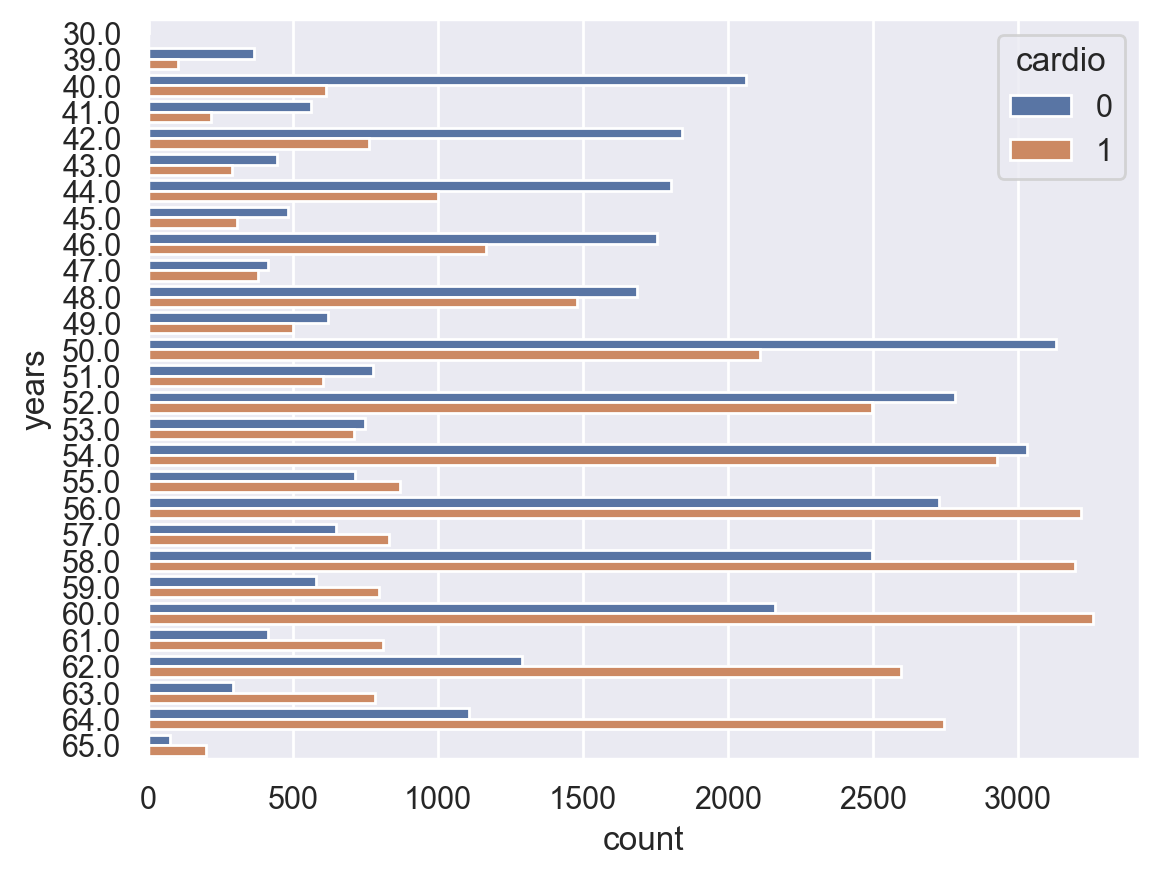

In [250]:
sns.countplot(data=clean_age_df, y='years', hue='cardio')